<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

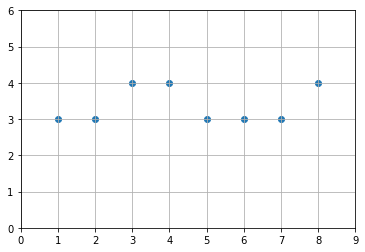

In [2]:
# Example 1: here we take data for linear regression, with m=0, or y=b

x=np.array([1, 2, 3 , 4, 5, 6, 7, 8 ])
y=np.array([3, 3, 4, 4, 3, 3, 3, 4])
plt.scatter(x,y)
plt.axis([0,9,0,6])
plt.grid()

# some initializations and computations
b=1                       # can be zero  
learning_rate = 0.2       # typical values are 0.1, 0.01, 0.001 etc
N=len(x)
mse = []



 Mean squared error =  5.875
b new =  1.9500000000000002


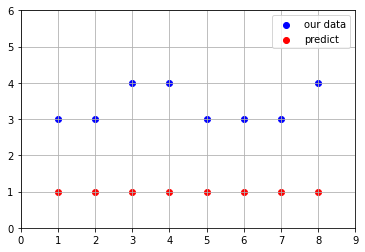

In [3]:
# The steps in ONE iteration

y_hat= np.full((1,N),b)       # compute y_hat for the present value of b

the_difference = y-y_hat      # compute the difference of Acutal and Predicted

mean_sq_error=np.mean((the_difference)**2)    

b_gradient = (-2/N) * np.sum(the_difference)
 
b = b - learning_rate * b_gradient

# repeat the above steps every iteration

plt.scatter(x,y,c='b', label='our data')
plt.scatter(x,y_hat,c='r', label='predict')
plt.grid()
plt.axis([0,9,0,6])
plt.legend()

print('\n Mean squared error = ',mean_sq_error)
mse.append(mean_sq_error)
print('b new = ', b)


Learning rate =  0.2


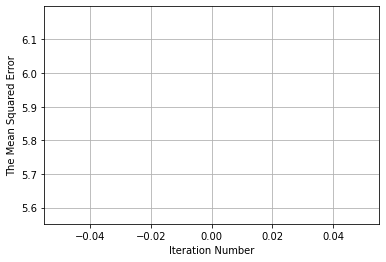

In [4]:
# to plot the mean_squared_error

plt.plot(mse)
plt.xlabel('Iteration Number')
plt.ylabel('The Mean Squared Error')
plt.grid()
print('Learning rate = ', learning_rate)

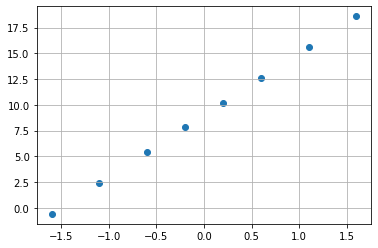

In [5]:
# Example 2: here we take data for linear regression, with y=mx + b

#X=np.array([1, 2, 3 , 4, 5, 6, 7, 8 ])
#mew=np.mean(X)
#sigma=np.std(X)
#X=(X-mew)/sigma

X= np.array([-1.6, -1.1, -0.6, -0.2, 0.2, 0.6, 1.1, 1.6])
y=6*X+9

N=len(X)
plt.scatter(X,y)
plt.grid()

# some initializations
m=0.1
b=0
learning_rate = 0.2
mse = []


-12.301500000000003 -18.0
m new =  2.5603000000000007
b new =  3.6


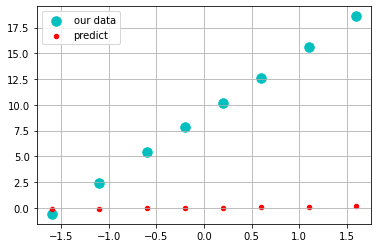

In [6]:
# The steps in ONE iteration
# compute y_hat for the present value of m, and b 

y_hat= m*X + b

the_difference = y-y_hat

b_gradient = (-2/N) * np.sum(the_difference)
m_gradient = (-2/N) * np.dot(the_difference,X)  

m = m - learning_rate * m_gradient
b = b - learning_rate * b_gradient

mean_sq_error=np.mean((the_difference)**2)
mse.append(mean_sq_error)

# repeat the above steps

plt.scatter(X,y,c='c', label='our data', s=90)
plt.scatter(X,y_hat,c='r', label='predict', s=20)
plt.grid()
plt.legend()

print(m_gradient, b_gradient)
print('m new = ', m)
print('b new = ', b)


In [7]:
print(mse)

[117.28942500000001]


Learning rate =  0.2
2.5603000000000007 3.6


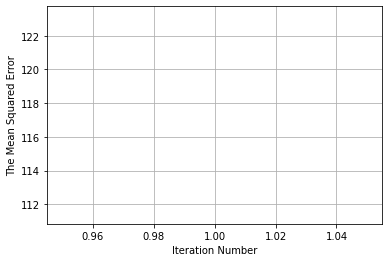

In [8]:
# to plot the mean_squared_error
M = len(mse)
i=np.arange(1,M+1)
plt.plot(i,mse)
plt.xlabel('Iteration Number')
plt.ylabel('The Mean Squared Error')
plt.grid()
print('Learning rate = ', learning_rate)
print(m,b)

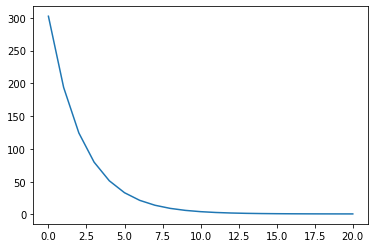


 m =  8.990755770725642 b =  14.733750690045456 mse =  0.8230251680300953


In [12]:
# Example I 
# line with added Gaussian noise

N=90
X=np.linspace(10,20,N)
mew=np.mean(X)
sigma=np.std(X)
X=(X-mew)/sigma
y=9*X+15

noise =np.random.randn(N)
y = y + noise

m,b,mse = my_LinearRegression(X,y,21,0.1)

plt.plot(mse)
plt.show()

print('\n m = ',m,'b = ',b,'mse = ',mse[-1])


In [11]:
# Our function for Linear Regression

def my_LinearRegression(X,y,Iterations, learning_rate):
    
    # normalize the input
    mew=np.mean(X)
    sigma=np.std(X)
    X=(X-mew)/sigma
    N=len(X)
    
    # some initializations
    m=0.1
    b=0
    mse = []

    for i in range(Iterations):
        # The steps in one iteration
        y_hat= m*X + b
        the_difference = y-y_hat
        b_gradient = (-2/N) * np.sum(the_difference)
        m_gradient = (-2/N) * np.dot(the_difference,X)  
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient
        mean_sq_error=np.mean((the_difference)**2)
        mse.append(mean_sq_error)

    return m, b, mse

initial y =  [ 9.88350313 10.85627059 14.02347036 15.38530308 19.87981201 23.78445012
 24.30490396 26.52684919 29.80847754 32.01790514 35.79233304 39.26356366
 41.21567196 42.58032634 46.1471949  49.34502877 51.49949614 52.83088115
 58.92120984 58.87035417]
predicted y =  [ 8.73010988 11.40555623 14.08100259 16.75644894 19.4318953  22.10734165
 24.78278801 27.45823437 30.13368072 32.80912708 35.48457343 38.16001979
 40.83546614 43.5109125  46.18635885 48.86180521 51.53725157 54.21269792
 56.88814428 59.56359063]


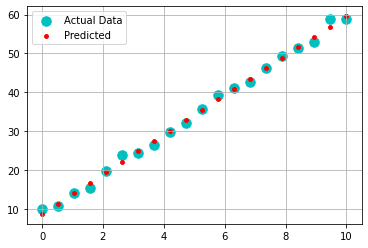

In [13]:
# Doing the same using the inbuilt Function from sklearn

from sklearn.linear_model import LinearRegression 

# data set I
#X=np.array([20, 35, 40, 25, 38, 30, 33, 27, 32, 36])
#y=np.array([60, 75, 95, 70, 85, 75, 80, 75, 72, 88])


# data set II
N=20
X=np.linspace(0,10,N)
y=5*X + 9
noise = np.random.randn(N)
y =y+noise
N=len(X)
X=X.reshape(N,1)

model=LinearRegression()
model.fit(X,y)
y_hat=model.predict(X)

print('initial y = ', y)
print('predicted y = ', y_hat)

plt.scatter(X,y,c='c',label='Actual Data', s=90)
plt.scatter(X,y_hat,c='r', label='Predicted ', s=15)
plt.legend()
plt.grid()



initial y =  [  9.97285436   6.21230921   9.38180178   7.86047167  10.96075619
  15.89151045  25.5404575   32.82003877  42.59569696  52.25675319
  63.74963425  81.1117342   94.09476189 117.15584481 135.57008562
 158.39428913 181.84084771 204.69225502 230.37683246 260.58625994]
predicted y =  [-38.21425201 -25.02819814 -11.84214427   1.3439096   14.52996347
  27.71601734  40.90207121  54.08812508  67.27417895  80.46023282
  93.64628669 106.83234056 120.01839443 133.2044483  146.39050217
 159.57655604 172.76260991 185.94866378 199.13471765 212.32077152]
variance  =  618.95
Mean =  21.4498


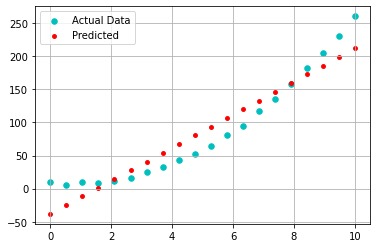

In [14]:
# An interesting example

from sklearn.linear_model import LinearRegression 

# data set II
N=20
X=np.linspace(0,10,N)

y = 3*X**2  - 5*X + 9

#y= 5*X + 9

noise = np.random.randn(N)
y =y + 1.5*noise
N=len(X)
X=X.reshape(N,1)

model=LinearRegression()
model.fit(X,y)
y_hat=model.predict(X)

print('initial y = ', y)
print('predicted y = ', y_hat)

plt.scatter(X,y,c='c',label='Actual Data', s=30)
plt.scatter(X,y_hat,c='r', label='Predicted ', s=15)
plt.legend()
plt.grid()

difference = (y-y_hat)
mean_square_error = np.sum(np.power(difference,2))/N 
print('variance  = ', round(mean_square_error,2))
mean_error = np.sum(np.absolute(difference))/N
print('Mean = ', round(mean_error,4))



In [15]:
# compute the averages
# slope of linear regression =(E(xy)-E(x)E(y))/variance(x)
#  bias of linear regression = E(y) - slope* E(x)
N=len(x)
mew_x = np.sum(x)/N
mew_y = np.sum(y)/N
sigma_x = np.std(x)
sigma_y = np.std(y)
mew_xy = np.dot(x,y)/N

cov_xy = mew_xy - mew_x*mew_y
m_stat = cov_xy/(sigma_x *sigma_s)    # correct values from statistics
b_stat = mew_y - m_stat*mew_x         # correct values from statistics

print('\nSlope of linear regression = ', m_stat)
print('\nIntercept of linear regression = ', b_stat )
print('\n\n')

x_test=np.linspace(-2,2,25)
y_predict= m_stat*x_test + b_stat

plt.plot(x_test, y_predict, label = 'Linear model', lw=3)
plt.scatter(x,y, label='given data', c='g')
plt.legend()

ValueError: ignored